In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# эстетики ради
import seaborn as sns
sns.set() 

In [2]:
country_data = pd.read_csv('../../data/raw/country_data.csv', parse_dates = ['report_dt'])

In [6]:
data = country_data.\
    drop('metric', axis =1).\
    set_index('report_dt').\
    sort_index().\
    squeeze() # превращаем dataframe в series

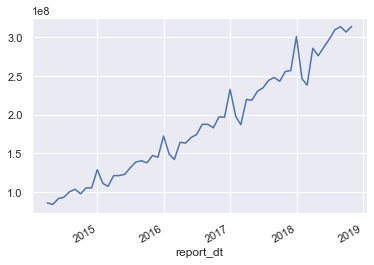

In [15]:
data.plot()
plt.show()

In [11]:
test = data.iloc[-6:]

# в обучающую выборку попадают все точки, кроме имеющихся в тестовой выборке
train = data[~data.index.isin(validation_split.index)] 

In [50]:
train.to_frame('y').reset_index().head() # убрать дату из индекса в столбец со значениями

,report_dt,y
0,2014-03-31,8.622745e+07
1,2014-04-30,8.416471e+07
2,2014-05-31,9.167135e+07
3,2014-06-30,9.340469e+07
4,2014-07-31,1.005175e+08


In [52]:
# убрать дату из индекса в столбец со значениями
# второй reset_index() переносит прежний индекс в столбец и тем самым легко делаем столбец иксов
train.to_frame('y').reset_index().reset_index().head() 

,index,report_dt,y
0,0,2014-03-31,8.622745e+07
1,1,2014-04-30,8.416471e+07
2,2,2014-05-31,9.167135e+07
3,3,2014-06-30,9.340469e+07
4,4,2014-07-31,1.005175e+08


# 1. Задача минимум (обязательно)

На обучающей выборке `train` построить линейную регрессию. Сформировать прогноз на 6 точек в будущее. 
Посчитать ошибку на отложенной выборке таблицы `test`.
Взять среднее по полученным ошибкам (MAPE).



# 2. Задача на средний уровень (опционально)

Аналогично практическому занятию в субботу 7 марта реализовать фичи в модели:
- x - порядковый индекс точки. 1 - для самой поздней (2014-03-31) и далее по нарастающей
- Степенные столбцы x^2, x^3
- `one hot encoding` для номера месяца в году.

__подсказка №1__: номер месяца можно вытащить из даты через <index>.month для индекса или <column>.dt.month для столбца 

__подсказка №2__: `one hot encoding` легко делается при помощи метода  `pd.get_dummies`. 


Построить модель и расчитать MAPE для тестовой выборки

In [37]:
train.index.month # номер месяца

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
             1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4],
           dtype='int64', name='report_dt')

In [ ]:
# получение номера месяца 
train.to_frame('y').reset_index().report_dt.dt.month

# 3. Задача максимум
Вместо прогнозирования абсолютных значений можно прогнозировать относительные приросты (они более стабильны). После прогнозирования приростов необходимо куммулятивно восстановить изначальные значения через `pd.cumprod`

## Ответы отправить через форму `Google Опросы` https://forms.gle/83XzC5Xq3rK1xESg7